<a href="https://colab.research.google.com/github/Wleturia/salt-and-pepper/blob/main/Sal_y_Pimienta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install scikit-image

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy
import IPython
from PIL import Image
import random
import urllib.request
from google.colab import files
from skimage import metrics
# from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt

In [ ]:
!ls

image-done.jpg	image-gray.jpg	image.jpg  sample_data


In [ ]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = numpy.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [ ]:
def drawColor(color):
  display(IPython.display.HTML('<div style="height: 50px; width:50px; background:{}"></div>'.format(color)))

In [ ]:
def dibujarPixel(avg_color_int):
  red, green, blue = avg_color_int
  hex = "#{0:02x}{1:02x}{2:02x}".format(red, green, blue)
  drawColor(hex)

In [ ]:
def obtenerMediana(pixel_x, pixel_y, img):
  pixeles = []
  for x in range(pixel_x - 1, pixel_x + 2):
    for y in range(pixel_y -1, pixel_y + 2):
      if x == pixel_x and y == pixel_y: # Saltar el pixel
        continue
      pixeles.append(img[y][x])

  avg_color = numpy.average(pixeles, axis=0)
  avg_color_int = map(lambda x: int(x), avg_color)
  avg_tupla = tuple(avg_color_int)
  return avg_tupla

In [ ]:
def limpiezaSalYPimienta(img, factor_w = 240, factor_b = 15):
  height, width, channels = img.shape

  img_nueva = Image.new("RGB", (width, height))
  for pixel_w in range(0, width - 1):
    for pixel_h in range(0, height - 1):
      pixel_c = tuple(img[pixel_h][pixel_w])

      is_light = numpy.mean(pixel_c) >= factor_w
      is_dark = numpy.mean(pixel_c) <= factor_b
      if is_light or is_dark:
        pixel_c = obtenerMediana(pixel_w, pixel_h, img)
      
      img_nueva.putpixel((pixel_w, pixel_h), pixel_c)

  return img_nueva

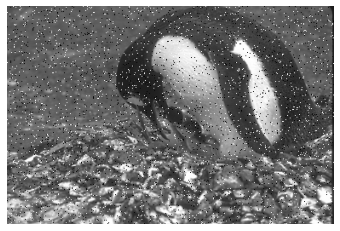

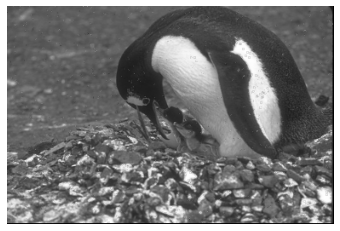

In [ ]:
penguin = url_to_image('https://raw.githubusercontent.com/Wleturia/salt-and-pepper/main/img5.png')  

plt.imshow(penguin)
plt.axis("off")
plt.show()
plt.imshow(limpiezaSalYPimienta(penguin))
plt.axis("off")
plt.show()

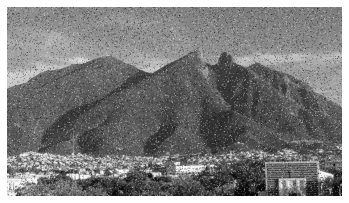

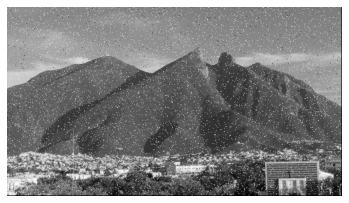

In [ ]:
land = url_to_image('https://raw.githubusercontent.com/Wleturia/salt-and-pepper/main/img6.jpg')  

plt.imshow(land)
plt.axis("off")
plt.show()
plt.imshow(limpiezaSalYPimienta(land))
plt.axis("off")
plt.show()
plt.imshow(limpiezaSalYPimienta(land, 200, 30))
plt.axis("off")
plt.show()

In [ ]:
vase = url_to_image('https://raw.githubusercontent.com/Wleturia/salt-and-pepper/main/img7.png')  

plt.imshow(vase)
plt.axis("off")
plt.show()
plt.imshow(limpiezaSalYPimienta(vase))
plt.axis("off")
plt.show()

In [ ]:
tiger = url_to_image('https://raw.githubusercontent.com/Wleturia/salt-and-pepper/main/img8.png')  

plt.imshow(tiger)
plt.axis("off")
plt.show()
plt.imshow(limpiezaSalYPimienta(tiger))
plt.axis("off")
plt.show()

In [ ]:
def imageToBlackAndWhite(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
  return img_gray

In [ ]:
def addSaltAndPepper(img, quantity = 0.05, salt = 0.5):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

  height, width, channels = img.shape

  sal_y_pimienta_anadida = []

  pepper = 1.0 - salt
  total_salt_and_pepper = (height * width) * quantity;

  for opt in range(int(numpy.ceil(total_salt_and_pepper))):
    coordenada_x, coordenada_y = random.randint(0,width - 1), random.randint(0,height - 1)
    
    if opt >= int(total_salt_and_pepper * salt):
      img_gray[coordenada_y][coordenada_x] = 0
    else:
      img_gray[coordenada_y][coordenada_x] = 255

  return img_gray



tiger = url_to_image('https://raw.githubusercontent.com/Wleturia/salt-and-pepper/main/clean1.jpg')  

tiger_bw = imageToBlackAndWhite(tiger)

cv2.imwrite('image-gray.jpg',tiger_bw)
cv2.imwrite('image.jpg',addSaltAndPepper(tiger_bw))

In [ ]:
def mse(img1, img2):
	# 'Mean Squared Error' 
	# Suma de la diferencia cuadrada entre ambas imágenes;
	# La imágenes deben tener igual dimensión
	err = numpy.sum((img1.astype("float") - img2.astype("float")) ** 2)
	err /= float(img1.shape[0] * img1.shape[1])
	return err

In [ ]:
def compare_images(img1, img2, title):
  m = mse(img1, img2)
  s = metrics.structural_similarity(img1, img2,multichannel=True)

  fig = plt.figure(title, figsize=(10,6))
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s), color ="white")

  # Imagen 1
  ax = fig.add_subplot(2, 2, 1)
  plt.imshow(img1, cmap = plt.cm.gray)
  plt.axis("off")
  
  # Imagen 2
  ax = fig.add_subplot(2, 2, 2)
  plt.imshow(img2, cmap = plt.cm.gray)
  plt.axis("off")
  
  plt.show()

In [ ]:
tiger_gs = cv2.imread('image-gray.jpg')  
tiger_sp = cv2.imread('image.jpg')  
tiger_done = numpy.array(limpiezaSalYPimienta(tiger_sp))

cv2.imwrite('image-done.jpg',tiger_done)

# plt.imshow(tiger_sp)
# plt.show()
# plt.imshow(tiger_done)
# plt.show()
compare_images(tiger_gs, tiger_done, 'Imagen con ruido vs sin ruido')